In [1]:
import sys
sys.path.insert(0, '/home/matt/plasma/fk-itg-slab/diagnostics/')
import yoshida_bin
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import dielectric
from scipy.optimize import fsolve

th = 1.
kx = 0.2
ky = np.linspace(0.1,0.8,15)
kpar = 0.01 * ky
kapn = 0.00
kapt = 0.05
alpha = 0.0
memi = 1./1836.

guess = np.array([[-.001,.0001],[0.2,0.0],[1.99,0.0],[2.999,0.0],[3.9999,-0.005]])
om = np.zeros((guess.shape[0],len(ky)))
gm = np.zeros((guess.shape[0],len(ky)))

for i in range(guess.shape[0]):
    for j in range(len(ky)):
        om[i,j], gm[i,j] = fsolve(dielectric.DKEdielectricFunc, guess[i,:], args = (th, kx, ky[j], kpar[j], kapn, kapt, alpha, memi))
        guess[i,:] = np.array([om[i,j],gm[i,j]])
        print('ky = {0:.6f}, omega = {1:.6f}, gamma = {2:.6f}'.format(ky[j],om[i,j],gm[i,j]))


ky = 0.100000, omega = -0.001534, gamma = 0.000387
ky = 0.150000, omega = -0.002325, gamma = 0.000571
ky = 0.200000, omega = -0.003142, gamma = 0.000742
ky = 0.250000, omega = -0.003990, gamma = 0.000897
ky = 0.300000, omega = -0.004870, gamma = 0.001030
ky = 0.350000, omega = -0.005779, gamma = 0.001136
ky = 0.400000, omega = -0.006711, gamma = 0.001213
ky = 0.450000, omega = -0.007659, gamma = 0.001256
ky = 0.500000, omega = -0.008613, gamma = 0.001266
ky = 0.550000, omega = -0.009562, gamma = 0.001239
ky = 0.600000, omega = -0.010494, gamma = 0.001177
ky = 0.650000, omega = -0.011400, gamma = 0.001080
ky = 0.700000, omega = -0.012269, gamma = 0.000948
ky = 0.750000, omega = -0.013095, gamma = 0.000781
ky = 0.800000, omega = -0.013871, gamma = 0.000580
ky = 0.100000, omega = 0.204933, gamma = -0.000103
ky = 0.150000, omega = 0.277957, gamma = -0.000720
ky = 0.200000, omega = 0.335066, gamma = -0.002995
ky = 0.250000, omega = 0.382015, gamma = -0.008106
ky = 0.300000, omega = 0.422514

/home/matt/plasma/fk-itg-slab/diagnostics/dielectric.py:204: RuntimeWarning: invalid value encountered in double_scalars
  elif abs(ngradc)/abs(ngrad) > tol:


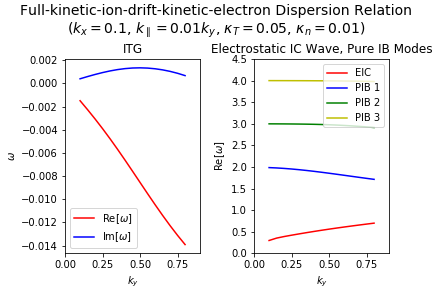

In [3]:
plt.figure()
plt.suptitle("Full-kinetic-ion-drift-kinetic-electron Dispersion Relation\n($k_x = 0.1$, $k_\parallel = 0.01 k_y$, $\kappa_T = 0.05$, $\kappa_n = 0.01$)", fontsize=14)

lines = ['r-','b-','g-','y-']

plt.subplot(121)
plt.plot(ky,om[0,:],lines[0])
plt.plot(ky,gm[0,:],lines[1])
plt.xlim([0.0,0.9])
plt.xlabel("$k_y$")
plt.ylabel("$\omega$")
plt.title("ITG")
plt.legend(["Re[$\omega$]","Im[$\omega$]"],loc="best")
#plt.xticks(visible=False)

plt.subplot(122)
for i in range(1, guess.shape[0]):
    plt.plot(ky,om[i,:],lines[i-1])

#plt.ylim(bottom = 0.0)
plt.ylim([0.0,4.5])
plt.xlim([0.0,0.9])
plt.xlabel("$k_y$")
plt.ylabel("Re[$\omega$]")
plt.title("Electrostatic IC Wave, Pure IB Modes")
plt.legend(["EIC","PIB 1","PIB 2","PIB 3"],loc="upper right")

plt.gcf().subplots_adjust(top=.8, left=.15, wspace = 0.4)
plt.savefig("dke_disp.png")
